美团点评分类
[NLP汇总](https://github.com/point6013/meituan_reviews_analysis/blob/master/meituan_nlp_algorithms.ipynb)



In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import time

# 数据分析清理

In [4]:
df = pd.read_excel("all_data_meituan.xlsx")
df[:3]

Unnamed: 0  anonymous  avgPrice  \
0           0      False        73   
1           1      False        73   
2           2      False        73   

                                             comment    commentTime  \
0  还行吧，建议不要排队那个烤鸭和羊肉串，因为烤肉时间本来就不够，排那个要半小时，然后再回来吃烤...  1525875708515   
1  去过好几次了 东西还是老样子 没增添什么新花样 环境倒是挺不错 离我们这也挺近 味道还可以 ...  1527853291658   
2  一个字：好！！！ #羊肉串# #五花肉# #牛舌# #很好吃# #鸡软骨# #拌菜# #抄河...  1522813943711   

    dealEndtime       did   menu  \
0  1.530338e+09  44328533  单人午晚餐   
1  1.530338e+09  44328241  2人午晚餐   
2  1.530338e+09  44328241  2人午晚餐   

                                             picUrls  quality  readCnt  \
0  [{'id': -1445845615, 'url': 'http://p0.meituan...     True    25434   
1  [{'id': -1429563625, 'url': 'http://p0.meituan...    False     7293   
2  [{'id': -1470528103, 'url': 'http://p0.meituan...    False    31787   

   replyCnt    reviewId  star     userId  userLevel         userName  \
0         0  1674208634    40  291754497          1           q哈哈哈qq   
1         0  1693519286    40  829297130          2         love勇往直前   
2         0  1643219880    50   38217090          4  lllllllllhhhhh。   

                                             userUrl  zanCnt  
0  https://img.meituan.net/avatar/92de6ba9a330efe...       2  
1  https://img.meituan.net/avatar/095e2339acd2e50...       0  
2  https://img.meituan.net/avatar/eaf70e67eaa9c8d...       2

提取评论部分和评级

In [7]:
df = df[['comment', 'star']]
df.head()

comment  star
0  还行吧，建议不要排队那个烤鸭和羊肉串，因为烤肉时间本来就不够，排那个要半小时，然后再回来吃烤...    40
1  去过好几次了 东西还是老样子 没增添什么新花样 环境倒是挺不错 离我们这也挺近 味道还可以 ...    40
2  一个字：好！！！ #羊肉串# #五花肉# #牛舌# #很好吃# #鸡软骨# #拌菜# #抄河...    50
3  第一次来吃，之前看过好多推荐说这个好吃，真的抱了好大希望，排队的人挺多的，想吃得趁早来啊。还...    20
4  羊肉串真的不太好吃，那种说膻不膻说臭不臭的味。烤鸭还行，大虾没少吃，也就到那吃大虾了，吃完了...    30

In [8]:
df.shape

(17400, 2)

In [16]:
df['star'].unique()

array([40, 50, 20, 30, 10], dtype=int64)

In [17]:
df['sentiment']=df['star'].apply(lambda x:1 if x>30 else 0)
df=df.drop_duplicates() ## 去掉重复的评论
df=df.dropna()

In [20]:
df

comment  star  sentiment
0      还行吧，建议不要排队那个烤鸭和羊肉串，因为烤肉时间本来就不够，排那个要半小时，然后再回来吃烤...    40          1
1      去过好几次了 东西还是老样子 没增添什么新花样 环境倒是挺不错 离我们这也挺近 味道还可以 ...    40          1
2      一个字：好！！！ #羊肉串# #五花肉# #牛舌# #很好吃# #鸡软骨# #拌菜# #抄河...    50          1
3      第一次来吃，之前看过好多推荐说这个好吃，真的抱了好大希望，排队的人挺多的，想吃得趁早来啊。还...    20          0
4      羊肉串真的不太好吃，那种说膻不膻说臭不臭的味。烤鸭还行，大虾没少吃，也就到那吃大虾了，吃完了...    30          0
5      菜的种类好多，也很新鲜，大虾非常棒，还有烤鸭，味道不错，北极贝也新鲜好吃，小料种类也很多，喜...    40          1
6      还是很不错的，适合三五个人一起去。。？？！？。。？！！？？。，。？！？。。。    。。？？...    30          0
7      因为生日，加上许久没吃肉所以选择去的，之前来过感觉菜品很丰富，当然最重要的还是一群人要去吃肉...    50          1
8      特别好，听朋友说的这家自助店甜点特别多，就抱着好奇的心来了，结果真的没让我失望啊！甜点，寿司...    50          1
9      这个差评是给服务员的！我一件白半袖，新买的，我自己吃肉特别小心的一滴油没弄上，结果，服务员来...    10          0
10     种类丰富，食材好。美中不足，桌子太小，上次以为牛排，这次见到工作人员正在放，我说我要牛排，他...    30          0
11     在美团上买的卷，到店以后说在美团上买的不能积分。为什么不能积分呢，以前可没这说法。在美团上买...    30          0
12           美团上根本没说学生要带学生证 差的可以 饮料只给桌上的杯子 想喝别的还要自己刷杯子 烂    10          0
13     环境较热 酱料味道有点咸 服务员阿姨态度不错 菜品质量还算可以 适合家人一起吃饭 对环境档次...    30          0
14     品种齐全味道好！经常和朋友一起过去 #烤鸭# #酸奶布丁# #饺子# #很好吃# #牛板筋黄...    30          0
15                 肉不错  服务挺好  随叫随到  就是不要坐二楼  太热  味道也比一楼大    30          0
16     刘亚红，刘亚红。刘亚红。不知道是不是这几个字。但是名字肯定不会错了。\n    临走押金小票...    40          1
17     氛围真的很好，就是寿司不好吃，海鲜挺新鲜的，服务真的很好很好！因为我喜欢吃寿司所以对寿司要求...    50          1
18     种类挺多，就是满屋子全是人，环境特别差，跟进了菜市场似的，根本不能边吃边聊天，烤肉烤的也没尝...    20          0
19                                   我们的生活状态都不好玩不好了锕锕系元素    40          1
20                                     菜品很全，很不错，口感好，吃的舒服    30          0
21     清明节放假去的，排了一个小时的队才进去，店里人很多，但是上菜速度特别快，不会遇到菜没了的情况...    50          1
22     菜品种类很多，海鲜，蔬菜，牛羊肉，水果，饮料啤酒，烤鸭羊肉串水饺，等等，特别满足 #虾# #...    40          1
23     东西还可以，蛮新鲜的，推荐烤鸭和羊肉串，很好，挺喜欢二楼只是拿菜比较不方便，环境可以 #大虾...    40          1
24     跟老公一起去吃的。相当满意。我老公也说吃这个真值。还好吃。东西很多。我俩都好多东西还没吃。就...    50          1
25     服务周到，必须给那个服务员阿姨点赞，虽然等了半天，但是阿姨就问加桌可以吗，我们果断说可以，味...    50          1
26                      菜品比较丰富，味道也不错，只是有点儿不干净，在杯子里发现了异物。    30          0
27          服务态度很好，经常来吃的，一开始吃才48元。一路涨价🤣但是挺好吃的，菜品种多，样样俱全。    50          1
28     吃肉吃肉吃肉，口感很好，服务很好，几分钟过来换一次纸，而且到时间会有服务员过来提醒，稍微超一...    50          1
29     棒棒的。    种类很多！在北京的自助算比较有特色的，就是位置不太好，但是没有阻止吃货的心，...    50          1
...                                                  ...   ...        ...
16599                                      还是一如既往的好 回头客了    50          1
16790                                     非常不错的，性价比还行。常来    40          1
16791                               不错，和宿舍的女孩吃的，很不错，下次还来    40          1
16792                                         哎呀时间太久了我忘了    50          1
16793                                       味道好，服务好，值得一去    50          1
16794                                              不错的选择    50          1
16795            牛羊肉都是真货  对的起这个价格  服务不错  人太多  两点去还等了二十分钟    40          1
16796                               不如以前了，羊肉串很小很小，烤盘老是停电    20          0
16797                        还行吧，只是就是普通的一些菜品，吃次数多了就不想去了。    30          0
16798                              经常去，干净，吃的比较多，朋友聚会的好地方    40          1
16799                          不错不错，灰常好就是排队有点时间长下次去提前排队去    50          1
16990                                           #虾# #大虾#    50          1
16992                                   还不错 总去 就是吃不回来很可惜    40          1
16993                          服务热情，菜品丰富，新鲜，孩子特别喜欢！下次还来！    50          1
16994                                挺好，不过自己不太会烤。去吃总是拉肚子    30          0
16995  地点不是很好找，但是价格却是便宜，虾很不错，品类也挺多的，吃得很开心，服务态度也很好，有北极...    50          1
16996                          不知道多少次来了  反正总体就是不错的  很好很好    50          1
16997                        还不错，挺好吃的，布置的也很温馨，挺好吃的，就是要等位    30          0
16998                                    吃的很多，环境不错，五星好评。    50          1
16999        还不错，去了好几次了，跟朋友大吃大喝的好地方，厕所总排队，服务还好，甲鱼汤里没有甲鱼🐟    50          1
17190                            可以说是很不错了，比上次来服务员的态度好了很多    40          1
17191   #虾# #北极贝# #南瓜粥# #烤鸭羊肉串# #北极贝寿司# #水果寿司# #刺身# #...    50          1
17192                                    去过好的次了，种类多，挺

In [19]:
X=pd.concat([df[['comment']],df[['comment']],df[['comment']]])
y=pd.concat([df.sentiment,df.sentiment,df.sentiment])
X.columns=['comment']
X.reset_index
X.shape

(3138, 1)

In [29]:
X  # 文本数据,y标签

comment
0      还行吧，建议不要排队那个烤鸭和羊肉串，因为烤肉时间本来就不够，排那个要半小时，然后再回来吃烤...
1      去过好几次了 东西还是老样子 没增添什么新花样 环境倒是挺不错 离我们这也挺近 味道还可以 ...
2      一个字：好！！！ #羊肉串# #五花肉# #牛舌# #很好吃# #鸡软骨# #拌菜# #抄河...
3      第一次来吃，之前看过好多推荐说这个好吃，真的抱了好大希望，排队的人挺多的，想吃得趁早来啊。还...
4      羊肉串真的不太好吃，那种说膻不膻说臭不臭的味。烤鸭还行，大虾没少吃，也就到那吃大虾了，吃完了...
5      菜的种类好多，也很新鲜，大虾非常棒，还有烤鸭，味道不错，北极贝也新鲜好吃，小料种类也很多，喜...
6      还是很不错的，适合三五个人一起去。。？？！？。。？！！？？。，。？！？。。。    。。？？...
7      因为生日，加上许久没吃肉所以选择去的，之前来过感觉菜品很丰富，当然最重要的还是一群人要去吃肉...
8      特别好，听朋友说的这家自助店甜点特别多，就抱着好奇的心来了，结果真的没让我失望啊！甜点，寿司...
9      这个差评是给服务员的！我一件白半袖，新买的，我自己吃肉特别小心的一滴油没弄上，结果，服务员来...
10     种类丰富，食材好。美中不足，桌子太小，上次以为牛排，这次见到工作人员正在放，我说我要牛排，他...
11     在美团上买的卷，到店以后说在美团上买的不能积分。为什么不能积分呢，以前可没这说法。在美团上买...
12           美团上根本没说学生要带学生证 差的可以 饮料只给桌上的杯子 想喝别的还要自己刷杯子 烂
13     环境较热 酱料味道有点咸 服务员阿姨态度不错 菜品质量还算可以 适合家人一起吃饭 对环境档次...
14     品种齐全味道好！经常和朋友一起过去 #烤鸭# #酸奶布丁# #饺子# #很好吃# #牛板筋黄...
15                 肉不错  服务挺好  随叫随到  就是不要坐二楼  太热  味道也比一楼大
16     刘亚红，刘亚红。刘亚红。不知道是不是这几个字。但是名字肯定不会错了。\n    临走押金小票...
17     氛围真的很好，就是寿司不好吃，海鲜挺新鲜的，服务真的很好很好！因为我喜欢吃寿司所以对寿司要求...
18     种类挺多，就是满屋子全是人，环境特别差，跟进了菜市场似的，根本不能边吃边聊天，烤肉烤的也没尝...
19                                   我们的生活状态都不好玩不好了锕锕系元素
20                                     菜品很全，很不错，口感好，吃的舒服
21     清明节放假去的，排了一个小时的队才进去，店里人很多，但是上菜速度特别快，不会遇到菜没了的情况...
22     菜品种类很多，海鲜，蔬菜，牛羊肉，水果，饮料啤酒，烤鸭羊肉串水饺，等等，特别满足 #虾# #...
23     东西还可以，蛮新鲜的，推荐烤鸭和羊肉串，很好，挺喜欢二楼只是拿菜比较不方便，环境可以 #大虾...
24     跟老公一起去吃的。相当满意。我老公也说吃这个真值。还好吃。东西很多。我俩都好多东西还没吃。就...
25     服务周到，必须给那个服务员阿姨点赞，虽然等了半天，但是阿姨就问加桌可以吗，我们果断说可以，味...
26                      菜品比较丰富，味道也不错，只是有点儿不干净，在杯子里发现了异物。
27          服务态度很好，经常来吃的，一开始吃才48元。一路涨价🤣但是挺好吃的，菜品种多，样样俱全。
28     吃肉吃肉吃肉，口感很好，服务很好，几分钟过来换一次纸，而且到时间会有服务员过来提醒，稍微超一...
29     棒棒的。    种类很多！在北京的自助算比较有特色的，就是位置不太好，但是没有阻止吃货的心，...
...                                                  ...
16599                                      还是一如既往的好 回头客了
16790                                     非常不错的，性价比还行。常来
16791                               不错，和宿舍的女孩吃的，很不错，下次还来
16792                                         哎呀时间太久了我忘了
16793                                       味道好，服务好，值得一去
16794                                              不错的选择
16795            牛羊肉都是真货  对的起这个价格  服务不错  人太多  两点去还等了二十分钟
16796                               不如以前了，羊肉串很小很小，烤盘老是停电
16797                        还行吧，只是就是普通的一些菜品，吃次数多了就不想去了。
16798                              经常去，干净，吃的比较多，朋友聚会的好地方
16799                          不错不错，灰常好就是排队有点时间长下次去提前排队去
16990                                           #虾# #大虾#
16992                                   还不错 总去 就是吃不回来很可惜
16993                          服务热情，菜品丰富，新鲜，孩子特别喜欢！下次还来！
16994                                挺好，不过自己不太会烤。去吃总是拉肚子
16995  地点不是很好找，但是价格却是便宜，虾很不错，品类也挺多的，吃得很开心，服务态度也很好，有北极...
16996                          不知道多少次来了  反正总体就是不错的  很好很好
16997                        还不错，挺好吃的，布置的也很温馨，挺好吃的，就是要等位
16998                                    吃的很多，环境不错，五星好评。
16999        还不错，去了好几次了，跟朋友大吃大喝的好地方，厕所总排队，服务还好，甲鱼汤里没有甲鱼🐟
17190                            可以说是很不错了，比上次来服务员的态度好了很多
17191   #虾# #北极贝# #南瓜粥# #烤鸭羊肉串# #北极贝寿司# #水果寿司# #刺身# #...
17192                                    去过好的次了，种类多，挺实惠的
17193                                         #大虾# #北极贝#
17194               回头客，本来是冲着虾去的，但这次的虾都不太新鲜了，而且服务也没之前好了！
17195                                味道不错，东西挺多，就是地方不是很好找
17196                      味道很好 尤其喜欢南瓜粥每次去都喝两碗 烤鸭也不错 不限量
17197                                         菜还不是很多但是还行
17198                             菜品没有原来的多了，环境不错！周末人挺多的。
17199                                   菜品不错，吃几次了，种类也很齐全

[3138 rows x 1 columns]

In [30]:
# 数据处理，分词
import jieba

def segment(text):
    return " ".join(jieba.cut(text))

X['comment'] = X['comment'].apply(segment)
X.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\liu\AppData\Local\Temp\jieba.cache
Loading model cost 1.204 seconds.
Prefix dict has been built succesfully.


comment
0  还行 吧 ， 建议 不要 排队 那个 烤鸭 和 羊肉串 ， 因为 烤肉 时间 本来 就 不够...
1  去过 好 几次 了   东西 还是 老 样子   没 增添 什么 新花样   环境 倒 是 ...
2  一个 字 ： 好 ！ ！ ！   # 羊肉串 #   # 五花肉 #   # 牛舌 #   ...
3  第一次 来 吃 ， 之前 看过 好多 推荐 说 这个 好吃 ， 真的 抱 了 好 大 希望 ...
4  羊肉串 真的 不太 好吃 ， 那种 说 膻 不 膻 说 臭 不 臭 的 味 。 烤鸭 还 行...

In [31]:
# 切分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [41]:
X_train.head()

comment
9566   傻 逼 服务员 ， 团 的 俩 卷 只验 了 一个 没 办完 就 弄 别人 的 了 ， 见 ...
10594                 很 好 的 地方   # 烤鸭 #   # 虾 #   # 大虾 #
10392      肉类 ， 菜品 都 很 新鲜 ， 也 很 全 ！ 唯一 不足 的 就是 限时 两 小时 。
11     在 美团 上 买 的 卷 ， 到 店 以后 说 在 美团 上 买 的 不能 积分 。 为什么...
331    什么 东西 ， 天 啊 ， 恶心 死 了 ， 四个 人 吃 完全 部 躺 着 回家 ， 肉 ...

In [36]:
X_train.shape,X_test.shape

((2510, 1), (628, 1))

In [37]:
# 向量化
from sklearn.feature_extraction.text import  CountVectorizer
vect=CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [42]:
vect.fit_transform(X_train['comment'])

<2510x1968 sparse matrix of type '<class 'numpy.int64'>'
	with 21872 stored elements in Compressed Sparse Row format>

In [44]:
vect.fit_transform(X_train['comment']).toarray().shape

(2510, 1968)

In [46]:
# 去掉stopwords
# vect = CountVectorizer(token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b',stop_words=frozenset(stopwords)) # 去除停用词

# pd.DataFrame(vect.fit_transform(X_train['comment']).toarray(), columns=vect.get_feature_names()).head()

In [72]:
X = vect.fit_transform(X_train['comment']).toarray()
len(X[0])

1968

In [81]:
res, ans = [], []
for i in range(len(X[0])):
    if X[0][i] != 0:
        res.append(i)
        ans.append(X[0][i])
len(res),res,

(9, [30, 438, 449, 524, 1149, 1520, 1627, 1721, 1726])

In [67]:
X_train

comment
9566   傻 逼 服务员 ， 团 的 俩 卷 只验 了 一个 没 办完 就 弄 别人 的 了 ， 见 ...
10594                 很 好 的 地方   # 烤鸭 #   # 虾 #   # 大虾 #
10392      肉类 ， 菜品 都 很 新鲜 ， 也 很 全 ！ 唯一 不足 的 就是 限时 两 小时 。
11     在 美团 上 买 的 卷 ， 到 店 以后 说 在 美团 上 买 的 不能 积分 。 为什么...
331    什么 东西 ， 天 啊 ， 恶心 死 了 ， 四个 人 吃 完全 部 躺 着 回家 ， 肉 ...
5998                      口味 太好了   服务 没 的 说   环境 也 挺 好 的
596         没什么 特别 的 ， 附近 的 福成关 了 才 去 玫瑰 花园 ， 差 的 不是 一点点
156                            很 不错 ， 环境 也 很 好 。 服务 也 到位
128    玫瑰 烤肉 是 目前 我 吃 过 烤肉 自助 类 最 满意 的 餐厅 ， 种类 比较 齐全 ...
16791                  不错 ， 和 宿舍 的 女孩 吃 的 ， 很 不错 ， 下次 还来
328                           菜品 不错 ， 服务 一般 ， 二楼 环境 闷热 n
5194   虽然 菜品 各式各样 。 但是 很多 东西 都 非常 咸 。 一点 不 符合 自己 的 口味...
9197                我们 要 努力 去 争取 了 我 要 把 你 当成 自己 喜欢 做 自己
5794     # 烤鸭 #   # 大虾 #   # 虾 #   # 培根 #   # 羊肉串 #  ...
8592     质量 比 一般 的 自助 强 点 ， 但是 羊肉串 比 以前 差点 ， 一串 穿 的 肉 太小
10794                                             很 好吃 ！
10195                                         菜品 丰富 环境优美
384    因为 是 买 的 学生 的 价 ， 所以 只要 了 七十 ~ 而且 服务态度 超级 棒 ， ...
5596   全好   # 烤鸭 #   # 虾 #   # 培根 #   # 羊肉串 #   # 烤肉 ...
5597   玫瑰 花园 烤肉 棒棒 哒 ， 品种 多 。 新鲜 ， 每种 都 很 喜欢 ， 环境 也 不错 。
7196   菜品 很全   跟 女票 排队 排 了 蛮 久   进去 后全 拿 的 肉   味道 很 好...
12196                           环境 好   菜品 味道 棒   推荐 大家 来
17191    # 虾 #   # 北极 贝 #   # 南瓜 粥 #   # 烤鸭 羊肉串 #   #...
1793                      实在 是 不 好吃 ， 真的 不 骗人 ， 不会 再 来 。
13995                         价格 虽然 不 贵   但是 量 实在 少 的 可怜
11595              很 好吃 ， 价格 也 还 很 合理 ， 吃 的 很多 最 重要 好吃 ！
1399                                  菜品 种类 很多 ， 水果 很 新鲜
8399                        # 大虾 #   # 小 羊肉 #   # 小 布丁 #
136                        相当 的 不错 呢 😊 人 很多 ！ 服务态度 很 好 ！
7991   第一次 光顾 ， 看到 大家 的 评论 好 不错 ， 带 同事 一起 去 的 ， 大虾 不错...
...                                                  ...
4399                        还 不错 ， 这个 点 非常 火 ， 对得起 这个 价格
12192           还 不错 ， 很 好 ， 服务 热情 ， 及时 ， 菜品 多 ， 选择性 也 高
10596  周六日 人均 爆满   排号 等 了 将近 10 分钟   不过 品类 还 不错   就是 ...
318                                       挺 好 ， 吃 过 几次 了
21     清明节 放假 去 的 ， 排 了 一个 小时 的 队 才 进去 ， 店里 人 很多 ， 但是...
4194                             还 可以 吧   菜品 挺全 哈哈哈哈 哈哈哈
138                                     # 烤鸭 #   # 羊肉串 #
343    特别 好吃 ， 吃 了 好久 ， 有 很多 品种 就是 最后 有 一个 服务员 说 的 不是...
15197                  自助餐 不错 ， 很 好吃 ， 酸奶 糕点 也 都 挺好吃 的 ！
169    其他 都 挺 好 的 ， 前台 服务 特别 差 ， 每次 都 这样 ？ 不能 培训 一下 么...
1594                还 可以 吧 ， 比 传说 中 的 好像 差 那么 一点 。 个人 意见
10990             菜品 多 还 新鲜 价格便宜 ， 比 在 外面 吃 的 一百多 的 好多 了
4394                     环境 不错 👌 食品 新鲜 ， 品种繁多 、 味道 很 好 👍
791                                                   满意
10998                                         吃 了 太 多次 了
8197   挺好吃 的 ， 品种 挺 丰富 还有 最爱 吃 的 大虾 ， 专门 坐车 确定 ， 价格 亲...
130      东西 很多 ， 肥牛 很 不错 ， 很 好吃 ， 还有 凉菜 ， 自配 的 沙冰 特别 棒 。
12397             这次 的 食材 感觉 很 不 新鲜 。 肉 容易 碎 。 吃 完 都 闹肚子
43     4 大 一小 ， 团购 还用 了 张美团券 ， 总体 感觉 不错 ， 周日 又 赶上 母亲节...
3791                         不错 不错 ， 吃 了 几次 了 ， 学生 优惠 一点
1393                           肉类 种类 很多 ， 蛮 新鲜 ， 而且 服务 好
192    环境 不好 ， 在 一间 不怎么 通风 的 小间 里 ， 用 的 工业 大 风扇 通风 ， ...
4391   还 不错 ， 不想 有些 评论 的 那么 差 ， 这个 价钱 挺 值得   # 泡 芙 # ...
77     菜品 不错 ， 各种 口味 ， 而是 干净 卫生 ， 服务态度 特别 好 ， 给 满分 。 ...
7198   服务态度 还 可以 ， 不想 评价 的 那么 差 ， 挺火 的 ， 去 了 等位 等 一个 ...
16393                                                 好好
49                       一般 一般 ， 还 不开 空调 ， 不 知道 怎么 想 的 。
84         一直 吃 自助 都 是 他家 性价比 很 高 了 \n ！ ！ ！ ！ ！ ！ ！ ！ ？
359                                                   好吃
13190                              排队 等 了 快 2 小时   人太多 了

[2510 rows x 1 columns]

In [ ]:
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file,encoding="utf-8") as f:
        custom_stopwords_list=[i.strip() for i in f.readlines()]
    return custom_stopwords_list

# train model

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [49]:
lr = LogisticRegression()
pipe = make_pipeline(vect, lr)
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('logisticregression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

In [51]:
pipe.fit(X_train.comment, y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,


In [52]:
from sklearn import metrics


In [53]:
y_pred = pipe.predict(X_test.comment)

In [55]:
metrics.accuracy_score(y_test, y_pred)

0.9060509554140127

In [57]:
metrics.confusion_matrix(y_test, y_pred)

array([[177,  44],
       [ 15, 392]], dtype=int64)

In [58]:
y_pred_all = pipe.predict(X['comment'])
metrics.f1_score(y_true=y,y_pred=y_pred_all)
metrics.accuracy_score(y,y_pred_all)

0.9435946462715105

In [61]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss
lrvc = LogisticRegressionCV(Cs=[0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,10],scoring='accuracy',solver='saga',max_iter=10000,penalty='l2',verbose=0)
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
# lr=LogisticRegression(solver='saga',max_iter =10000)
pipe=make_pipeline(vect,lrvc)
# pipe=make_pipeline(vect,lr)
# pipe.steps
pipe.fit(X_train.comment, y_train)
y_pred = pipe.predict(X_test.comment)
metrics.accuracy_score(y_test,y_pred)

0.9394904458598726

In [62]:
metrics.confusion_matrix(y_test,y_pred)

array([[196,  25],
       [ 13, 394]], dtype=int64)

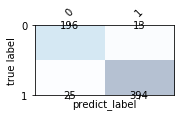

In [65]:
import  matplotlib.pyplot as  plt
def get_confusion_matrix(conf,clas):
 
    fig,ax=plt.subplots(figsize=(2.5,2.5))
    ax.matshow(conf,cmap=plt.cm.Blues,alpha=0.3)
    tick_marks = np.arange(len(clas))
    plt.xticks(tick_marks,clas, rotation=45)
    plt.yticks(tick_marks, clas)
    for i in range(conf.shape[0]):
        for j in range(conf.shape[1]):
            ax.text(x=i,y=j,s=conf[i,j],
                   va='center',
                   ha='center')
    plt.xlabel("predict_label")
    plt.ylabel("true label")
    
conf=metrics.confusion_matrix(y_test,y_pred)
class_names=np.array(['0','1'])  # 处理二分类数据
get_confusion_matrix(np.array(conf),clas=class_names)
plt.show()